<p align="center">
  <img src="https://github.com/user-attachments/assets/67f73417-649e-4967-abae-8a9717e74616"/>
</p>

## <picture> <img src = "https://github.com/7oSkaaa/7oSkaaa/blob/main/Images/Statistics.gif?raw=true" width = 50px>  </picture> Importaciones 

In [17]:
import sys
! pip install kaggle seaborn pandas numpy matplotlib
!{sys.executable} -m pip install kaggle seaborn pandas numpy matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("customer_shopping_data.csv")


# TRANSFORMACION DE DATOS
Convertiremos los datos en dimensiones que podremos utilizar facilmente

In [2]:
import string
def convertirIndice(idxString):
    lista_letras = list(string.ascii_lowercase)
    idxString = str(idxString)
    nuevo_idx = ""
    for char in idxString:
        if char.lower() in lista_letras:
            nuevo_idx += str(lista_letras.index(char.lower()))
        else:
            nuevo_idx += char
    return int(nuevo_idx)

In [3]:
df['customer_id'] = [convertirIndice(x) for x in df['customer_id']]
df['invoice_no'] = [convertirIndice(x) for x in df['invoice_no']]
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,8138884,2241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,8317333,2111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,8127801,2266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,8173702,2988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,8337046,2189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
# Crear la tabla DimCliente
DimCliente = df[['customer_id', 'gender', 'age']].drop_duplicates().reset_index(drop=True)
DimCliente.rename(columns={'customer_id': 'IDCliente', 'gender': 'Genero', 'age': 'Edad'}, inplace=True)
DimCliente.head()


,IDCliente,Genero,Edad
0,2241288,Female,28
1,2111565,Male,21
2,2266599,Male,20
3,2988172,Female,66
4,2189076,Female,53


In [5]:
# Crear la tabla DimProducto
DimProducto = df[['category']].drop_duplicates().reset_index(drop=True)
DimProducto['IDProducto'] = DimProducto.index + 1
DimProducto.rename(columns={'category': 'Categoria'}, inplace=True)

DimProducto.head()

,Categoria,IDProducto
0,Clothing,1
1,Shoes,2
2,Books,3
3,Cosmetics,4
4,Food & Beverage,5


In [6]:
# Crear la tabla DimFecha
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')
DimFecha = df[['invoice_date']].drop_duplicates().reset_index(drop=True)
DimFecha['IDFecha'] = DimFecha.index + 1
DimFecha['Año'] = DimFecha['invoice_date'].dt.year
DimFecha['Mes'] = DimFecha['invoice_date'].dt.month
DimFecha['DiaSemana'] = DimFecha['invoice_date'].dt.day_name()
DimFecha.rename(columns={'invoice_date': 'FechaFactura'}, inplace=True)

#DimFecha.sort_values(['Año', 'Mes', 'DiaSemana'])
DimFecha.head()

,FechaFactura,IDFecha,Año,Mes,DiaSemana
0,2022-08-05,1,2022,8,Friday
1,2021-12-12,2,2021,12,Sunday
2,2021-11-09,3,2021,11,Tuesday
3,2021-05-16,4,2021,5,Sunday
4,2021-10-24,5,2021,10,Sunday


In [7]:
# Crear la tabla DimTienda
DimTienda = df[['shopping_mall']].drop_duplicates().reset_index(drop=True)
DimTienda['IDTienda'] = DimTienda.index + 1
DimTienda.rename(columns={'shopping_mall': 'CentroComercial'}, inplace=True)
DimTienda.head()

,CentroComercial,IDTienda
0,Kanyon,1
1,Forum Istanbul,2
2,Metrocity,3
3,Metropol AVM,4
4,Istinye Park,5


In [8]:
# Fusionar con cada tabla de dimensiones
Ventas = df.merge(DimCliente, left_on='customer_id', right_on='IDCliente')\
           .merge(DimProducto, left_on='category', right_on='Categoria')\
           .merge(DimFecha, left_on='invoice_date', right_on='FechaFactura')\
           .merge(DimTienda, left_on='shopping_mall', right_on='CentroComercial')

# Seleccionar solo las columnas necesarias
Ventas = Ventas[['invoice_no', 'IDCliente', 'IDProducto', 'IDFecha', 'IDTienda', 'quantity', 'price', 'payment_method']]
Ventas.rename(columns={'invoice_no': 'NumFacturaNominal', 'quantity': 'Cantidad', 'price': 'Precio', 'payment_method': 'MetodoPago'}, inplace=True)
Ventas.head()

,NumFacturaNominal,IDCliente,IDProducto,IDFecha,IDTienda,Cantidad,Precio,MetodoPago
0,8138884,2241288,1,1,1,5,1500.40,Credit Card
1,8317333,2111565,2,2,2,3,1800.51,Debit Card
2,8127801,2266599,1,3,3,1,300.08,Cash
3,8173702,2988172,2,4,4,5,3000.85,Credit Card
4,8337046,2189076,3,5,1,4,60.60,Cash


# Gráficas del Dataset
Empezamos a visualizar los datos

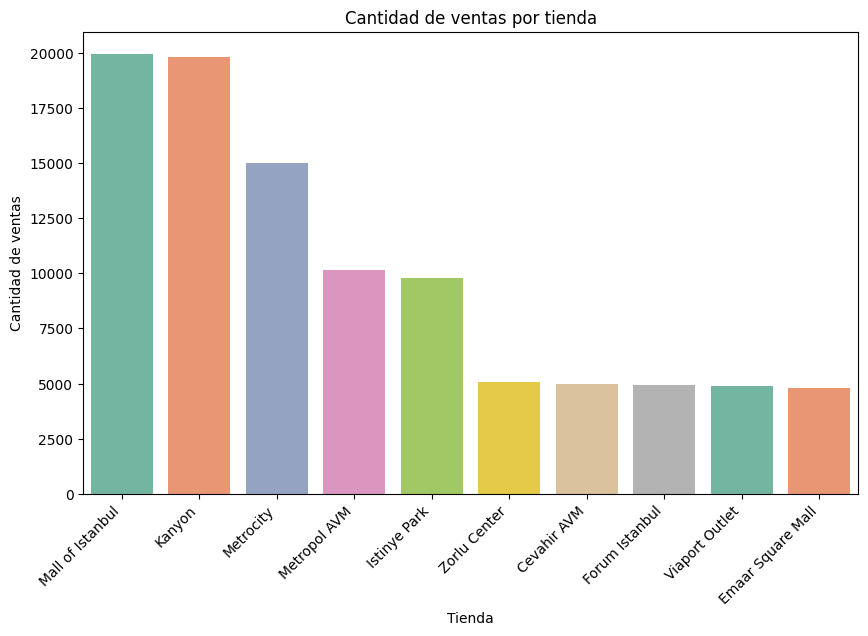

,CentroComercial,Cantidad,Ingreso_Bruto
5,Mall of Istanbul,19943,50872481.68
4,Kanyon,19823,50554231.10
6,Metrocity,15011,37302787.33
7,Metropol AVM,10161,25379913.19
3,Istinye Park,9781,24618827.68
9,Zorlu Center,5075,12901053.82
0,Cevahir AVM,4991,12645138.20
2,Forum Istanbul,4947,12303921.24
8,Viaport Outlet,4914,12521339.72
1,Emaar Square Mall,4811,12406100.29


In [9]:
#----------------CANTIDAD DE VENTAS POR TIENDA----------------
ventas_temp = Ventas.merge(DimTienda, left_on='IDTienda', right_on='IDTienda')
ventasTienda = ventas_temp.groupby('CentroComercial').size().reset_index(name='Cantidad')
ventas_temp['Ingreso_Bruto'] = ventas_temp['Cantidad'] * ventas_temp['Precio'] #DATAFRAME CON INGRESO BRUTO POR TIENDA
ventasTienda["Ingreso_Bruto"] = ventas_temp.groupby('CentroComercial')['Ingreso_Bruto'].sum().values

ventasTienda.sort_values('Cantidad', ascending=False, inplace=True)


plt.figure(figsize=(10, 6))
sns.barplot(x='CentroComercial', y= 'Cantidad', palette='Set2', data=ventasTienda, hue='CentroComercial')

plt.title('Cantidad de ventas por tienda') 
plt.xlabel('Tienda')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45, ha='right')
plt.show()

ventasTienda




J:\TempKobold\ipykernel_7088\2523465355.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DiaSemana', y='Ingreso_Bruto', data=ventas_por_dia_semana, palette='Set2')


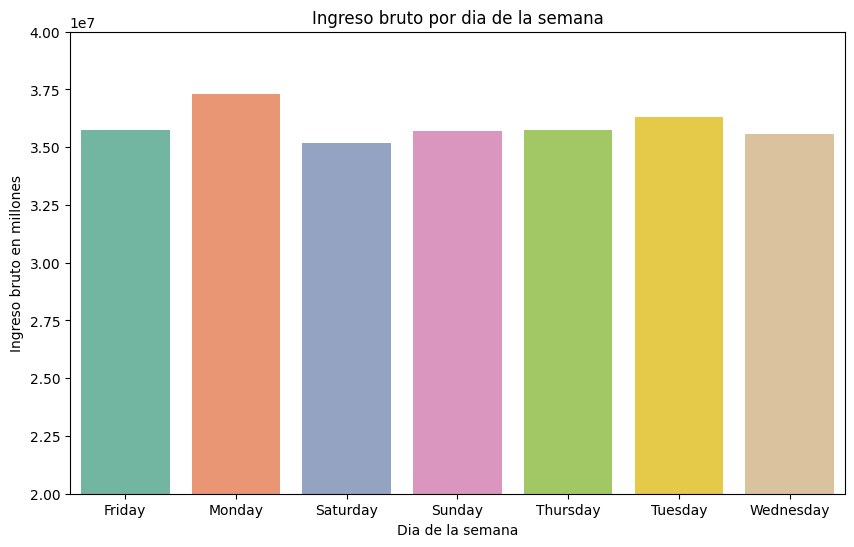

,DiaSemana,Ingreso_Bruto
0,Friday,35728331.39
1,Monday,37296648.11
2,Saturday,35179828.72
3,Sunday,35689090.61
4,Thursday,35738148.63
5,Tuesday,36298096.66
6,Wednesday,35575650.13


In [10]:
#----------------INGRESO BRUTO POR DIA----------------
ventas_por_dia_semana = Ventas.merge(DimFecha, left_on='IDFecha', right_on='IDFecha')
ventas_por_dia_semana['Ingreso_Bruto'] = ventas_por_dia_semana['Cantidad'] * ventas_por_dia_semana['Precio']
ventas_por_dia_semana = ventas_por_dia_semana[['DiaSemana', 'Ingreso_Bruto', 'Precio', 'Cantidad']]
ventas_por_dia_semana = ventas_por_dia_semana.groupby('DiaSemana')['Ingreso_Bruto'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='DiaSemana', y='Ingreso_Bruto', data=ventas_por_dia_semana, palette='Set2')
plt.ylim(20000000, 40000000)
plt.title('Ingreso bruto por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Ingreso bruto en millones')
plt.show()
ventas_por_dia_semana

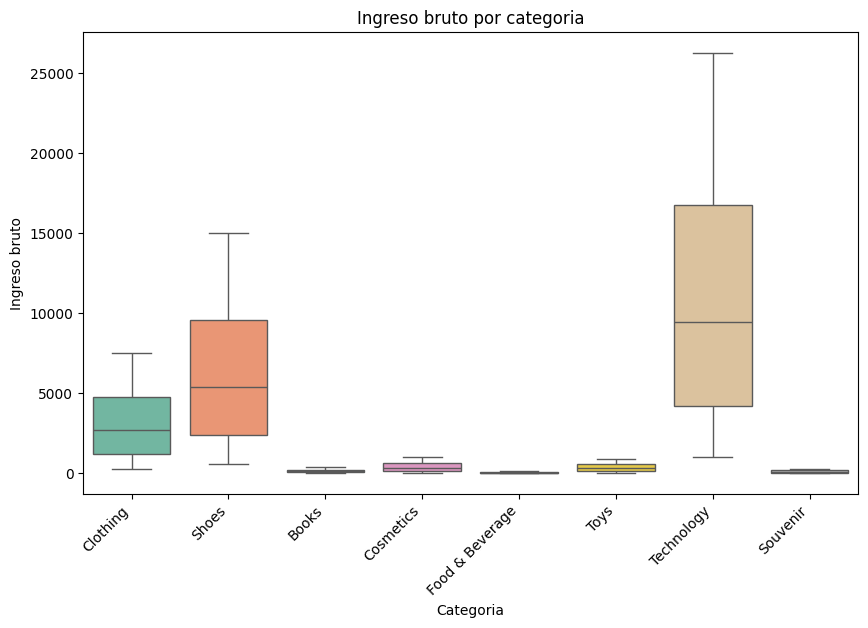

,Cantidad,Precio,Categoria,ingreso_bruto
0,5,1500.40,Clothing,7502.00
1,3,1800.51,Shoes,5401.53
2,1,300.08,Clothing,300.08
3,5,3000.85,Shoes,15004.25
4,4,60.60,Books,242.40
...,...,...,...,...
99452,5,58.65,Souvenir,293.25
99453,2,10.46,Food & Beverage,20.92
99454,2,10.46,Food & Beverage,20.92
99455,4,4200.00,Technology,16800.00


In [11]:
#----------------Ventas por Categorias y genero----------------
ventas_categorias_genero = Ventas.merge(DimProducto, left_on='IDProducto', right_on='IDProducto')
ventas_categorias_genero['ingreso_bruto'] = ventas_categorias_genero['Cantidad'] * ventas_categorias_genero['Precio']
ventas_categorias =ventas_categorias_genero[['Cantidad', 'Precio', 'Categoria', 'ingreso_bruto']]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria', y='ingreso_bruto', data=ventas_categorias, hue='Categoria', palette='Set2')
plt.title('Ingreso bruto por categoria')
plt.xlabel('Categoria')
plt.ylabel('Ingreso bruto')
plt.xticks(rotation=45, ha='right')
plt.show()

ventas_categorias



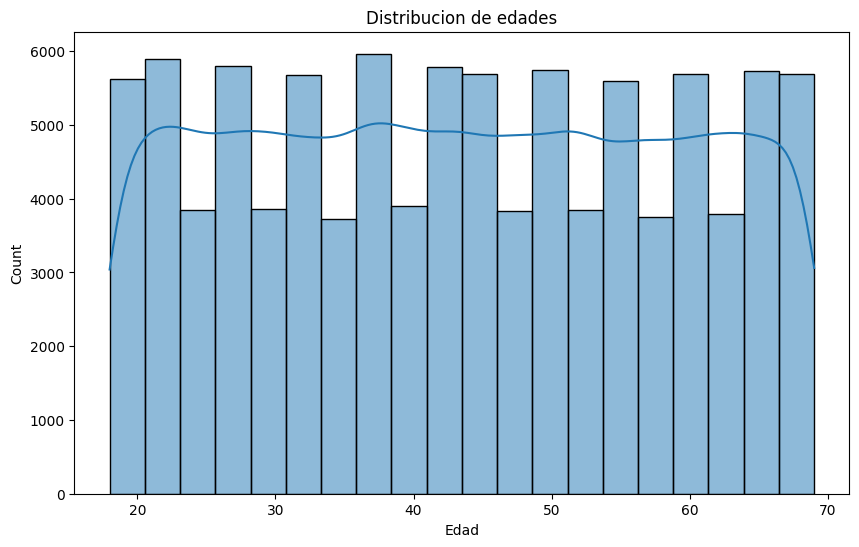

,NumFacturaNominal,IDCliente,IDProducto,IDFecha,IDTienda,Cantidad,Precio,MetodoPago,Categoria,ingreso_bruto,Genero,Edad
0,8138884,2241288,1,1,1,5,1500.40,Credit Card,Clothing,7502.00,Female,28
1,8317333,2111565,2,2,2,3,1800.51,Debit Card,Shoes,5401.53,Male,21
2,8127801,2266599,1,3,3,1,300.08,Cash,Clothing,300.08,Male,20
3,8173702,2988172,2,4,4,5,3000.85,Credit Card,Shoes,15004.25,Female,66
4,8337046,2189076,3,5,1,4,60.60,Cash,Books,242.40,Female,53


In [12]:
ventas_genero = ventas_categorias_genero.merge(DimCliente, left_on='IDCliente', right_on='IDCliente')
ventas_genero[['Genero', 'ingreso_bruto', 'Precio', 'Cantidad', 'Categoria', 'Edad']]

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribucion de edades')
plt.xlabel('Edad')
plt.show()

ventas_genero.head()


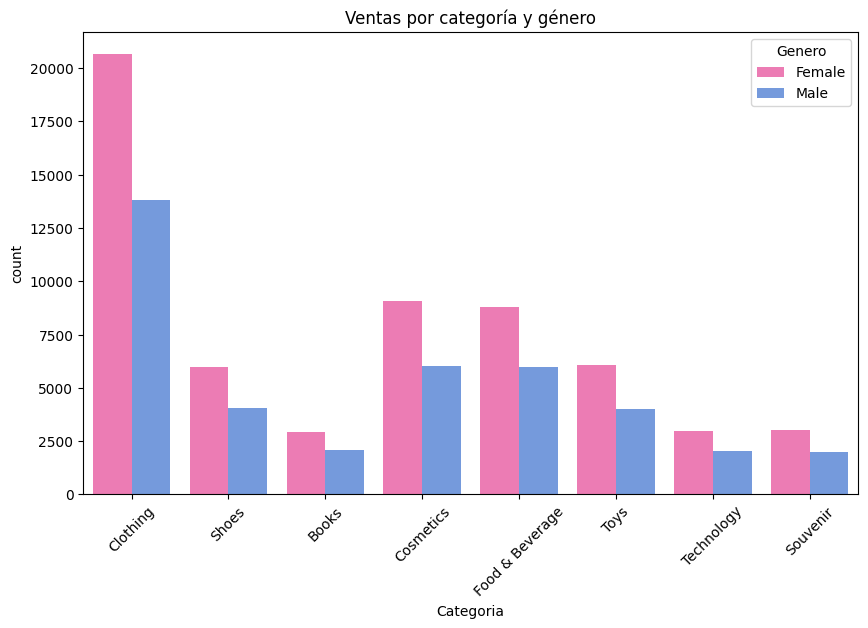

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ventas_genero, x='Categoria', hue='Genero', palette=['#FF69B4', '#6495ED'])  # Azul y rosado
plt.xticks(rotation=45)
plt.title('Ventas por categoría y género')
plt.show()

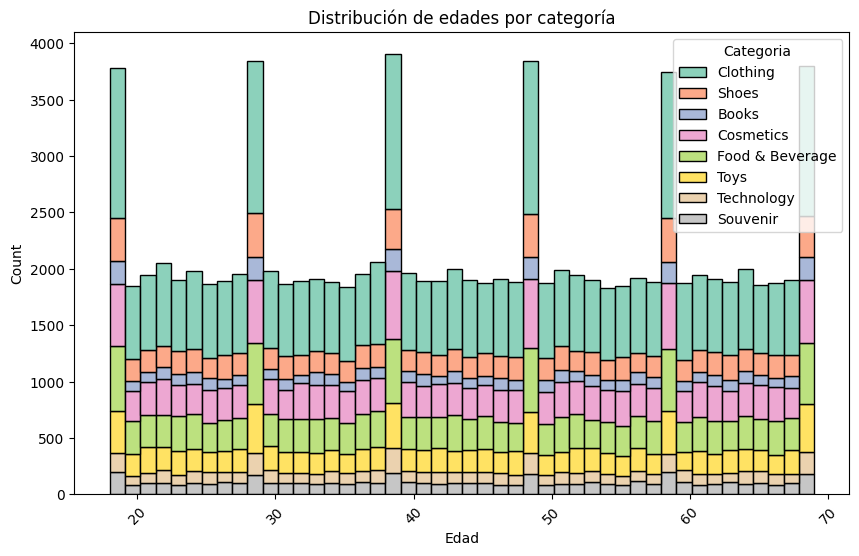

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ventas_genero, x='Edad', hue='Categoria', multiple='stack', palette='Set2')  
plt.title('Distribución de edades por categoría')
plt.xlabel('Edad')
plt.xticks(rotation=45)
plt.show()

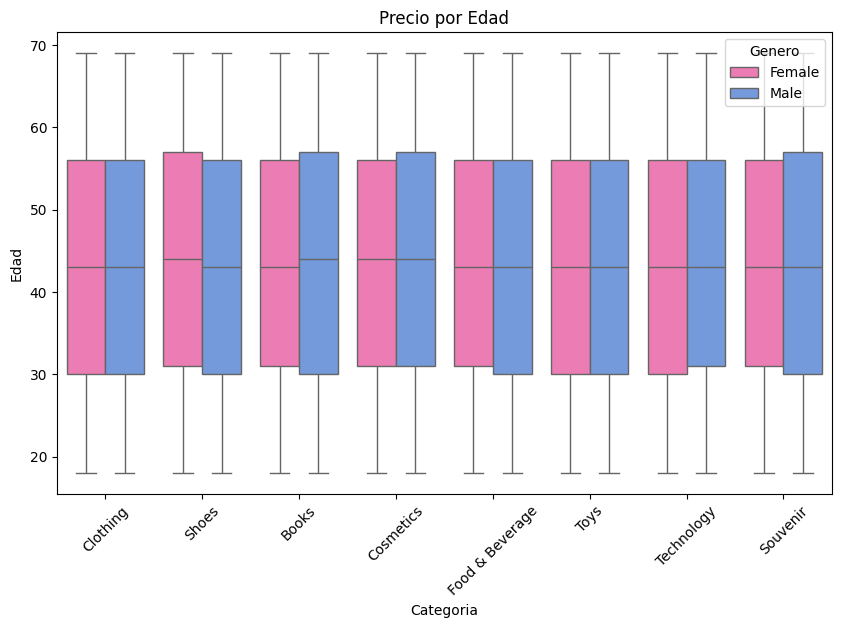

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas_genero, x='Categoria', y='Edad', hue='Genero', palette=['#FF69B4', '#6495ED'])
plt.xticks(rotation=45)
plt.title('Precio por Edad')
plt.show()

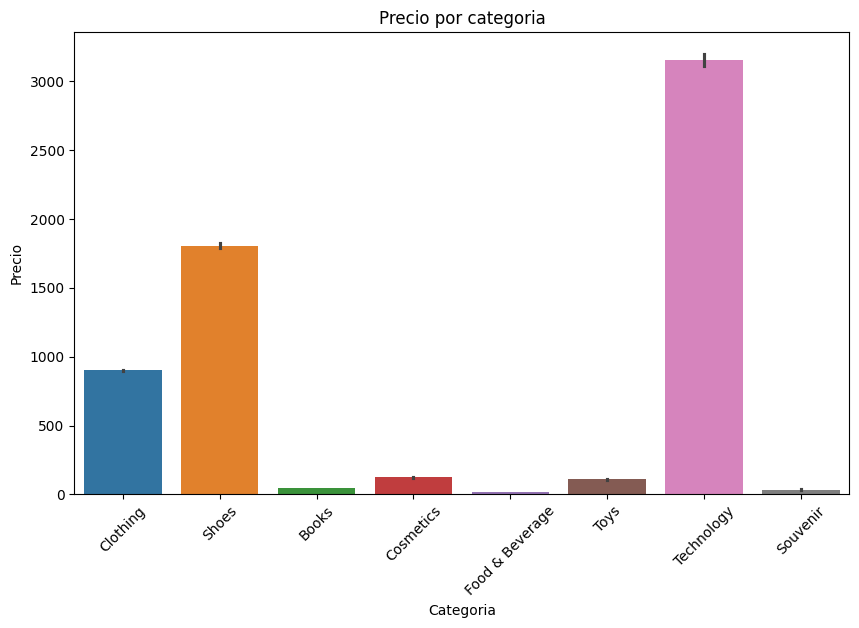

In [ ]:
plt.figure(figsize=(10, 6))
sns.pie(data=ventas_genero, x='Categoria', y='Precio', hue='Categoria')
plt.xticks(rotation=45)
plt.title('Precio por categoria')
plt.show()

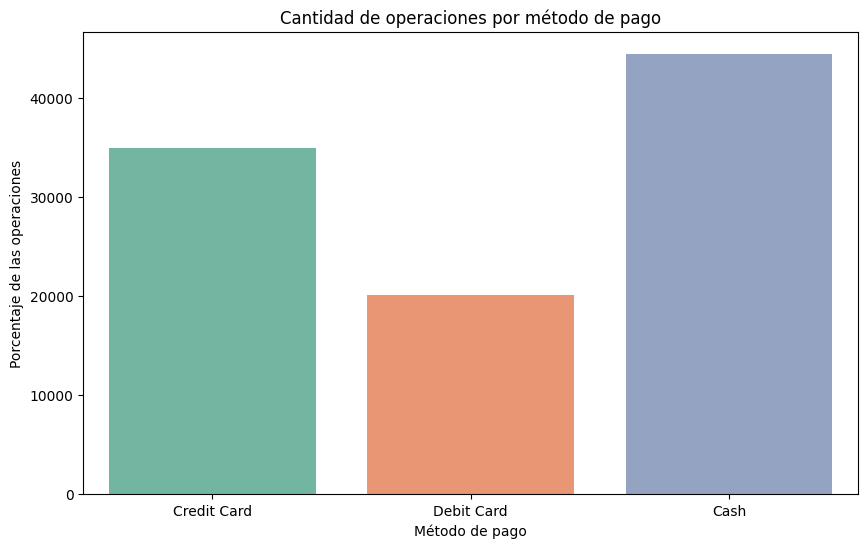

MetodoPago
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64

In [16]:
#------------CANTIDAD DE OPERACIONES SEGUN EL METODO DE PAGO----------------
ventasAgrupadas = Ventas.groupby('MetodoPago')

plt.figure(figsize=(10, 6))
sns.countplot(x='MetodoPago', data=Ventas, hue='MetodoPago', palette='Set2', stat='count', width=0.8)
plt.title('Cantidad de operaciones por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Porcentaje de las operaciones')
plt.show()

ventasAgrupadas.size()

# CONCLUSIONES

En resumen, el presente conjunto de datos de compras en Estambul entre 2021 y 2023 ofrece una perspectiva amplia y detallada sobre los hábitos de consumo en diez centros comerciales de la ciudad. A lo largo de su exploración, se observan múltiples dimensiones de análisis que abarcan características demográficas (edad, género), patrones de compra (categoría de producto, cantidad, precio unitario), métodos de pago utilizados (efectivo, tarjeta de crédito, tarjeta de débito) y aspectos temporales (fecha de la compra, posible estacionalidad). Esta diversidad de variables posibilita una comprensión integral de las tendencias de consumo y permite la segmentación de clientes según distintos criterios.

Los datos indican que existen diferencias notables en los patrones de compras según el género y la edad de los clientes. Se demuestra mediante los datos que los centros con más ingresos son "Mall of Istanbul" y "Kanyon" con patrones de ventas similares. Si bien, hay diferencias entre la cantidad de ingreso por cada tienda, los patrones de ventas son muy similares entre si.

 El análisis detallado de estos datos podría servir de base para la toma de decisiones en estrategias de marketing, gestión de inventarios, planificación de ofertas y programas de fidelización, así como para futuros estudios de segmentación de mercado y proyecciones de venta.
